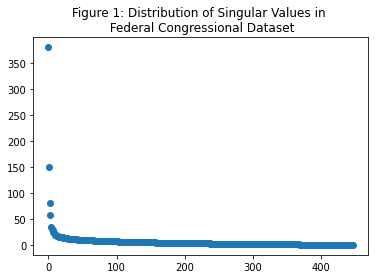

The rank is  448


In [5]:
import matplotlib.pyplot as plt
import numpy as np
 
X = np.genfromtxt("congress_votes.csv", delimiter=",", dtype=int)
u, s, vt = np.linalg.svd(X, full_matrices=False)

xpoints = range(len(s))
ypoints = s

plt.plot(xpoints, ypoints, 'o')
plt.title("Figure 1: Distribution of Singular Values in \n Federal Congressional Dataset")
plt.show()

print("The rank is ", np.linalg.matrix_rank(X))

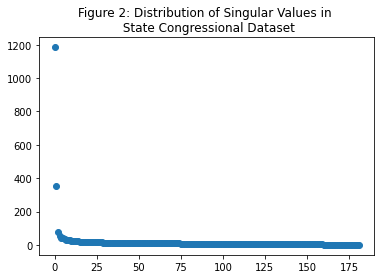

The rank is  178


In [7]:
X = np.genfromtxt("illinois_votes.csv", delimiter=",", dtype=int)
u, s, vt = np.linalg.svd(X, full_matrices=False)

xpoints = range(len(s))
ypoints = s

plt.plot(xpoints, ypoints, 'o')
plt.title("Figure 2: Distribution of Singular Values in \n State Congressional Dataset")
plt.show()

print("The rank is ", np.linalg.matrix_rank(X))

In [30]:
import numpy as np

def objective(V, W, H):
    ''' calculated the non-negative matrix factorization objective
        
    Usage:
        W, H = objective(V, W, H)
    Parameters:
        V: a (d x n)-array containing n observations in the columns
        W: (d x k)-array of non-negative basis images (components)
        H: (k x n)-array of weights, one column for each of the n observations
    Returns:
        F: a scalar objective
    '''    
    d, n = V.shape
    WH = np.dot(W, H)

    F = (V * np.log(WH) - WH).sum() / (d * n)
    return F


def update_W(V, W, H):
    ''' performs the multiplicative non-negative matrix factorization updates for W
        
    Usage:
        W, H = update_W(V, W, H)
    Parameters:
        V: a (d x n)-array containing n observations in the columns
        W: (d x k)-array of non-negative basis images (components)
        H: (k x n)-array of weights, one column for each of the n observations
    Returns:
        W: (d x k)-array of updated non-negative basis images (components)
    '''
    
    WH = np.dot(W, H)
    W_new = W * np.dot(V / WH, H.T)
    W_new = W_new / np.sum(W_new, axis=0, keepdims=True)    
    return W_new

def update_H(V, W, H):
    ''' performs the multiplicative non-negative matrix factorization updates
        
    Usage:
        W, H = update_H(V, W, H)
    Parameters:
        V: a (d x n)-array containing n observations in the columns
        W: (d x k)-array of non-negative basis images (components)
        H: (k x n)-array of weights, one column for each of the n observations
    Returns:
        H: (k x n)-array of updated weights, one column for each of the n observations
    '''
    
    WH = np.dot(W, H)
    H_new = H * np.dot((V / WH).T, W).T
    return H_new


def nmf(V, k, threshold=1e-5, maxiter=500):
    ''' decomposes X into k components by non-negative matrix factorization
        
    Usage:
        W, H = nmf(X, k)
    Parameters:
        V: a (d x n)-array containing n observations in the columns
        k: number of components to extract
        threshold: relative error threshold of the iteration
        maxiter: maximum number of iterations
    Returns:
        W: (d x k)-array of non-negative basis images (components)
        H: (k x n)-array of weights, one column for each of the n observations
    '''
    d, n = V.shape
    W = np.random.rand(d, k)
    H = np.random.rand(k, n)

    F = objective(V, W, H)
    
    it_no = 0
    converged = False

    while (not converged) and it_no <= maxiter:
        W_new = update_W(V, W, H)
        H_new = update_H(V, W_new, H)   
        F_new = objective(V, W_new, H_new)

        converged = np.abs(F_new - F) <= threshold 
        W, H = W_new, H_new
        it_no = it_no + 1
    
    return W, H